# Chapter 7 - Unsupervised Learning

Import required Python packages

In [52]:
import math
from pathlib import Path
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.stats import multivariate_normal

import prince

import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.colors import from_levels_and_colors
import seaborn as sns

%matplotlib inline

Path set:

In [54]:
SP500_DATA_CSV = r"\Personal\Full_Stack_Data_Analyst\Data_Science\O-Reilly_Books\Practical Statistics for Data Scientists\data\sp500_data.csv"
SP500_SECTORS_CSV = r"\Personal\Full_Stack_Data_Analyst\Data_Science\O-Reilly_Books\Practical Statistics for Data Scientists\data\sp500_sectors.csv"
LOAN_DATA_CSV = r"\Personal\Full_Stack_Data_Analyst\Data_Science\O-Reilly_Books\Practical Statistics for Data Scientists\data\loan_data.csv"
HOUSE_TASKS_CSV = r"\Personal\Full_Stack_Data_Analyst\Data_Science\O-Reilly_Books\Practical Statistics for Data Scientists\data\housetasks.csv"


# Principal Component Analysis

# A Simple Example
In _Python_, we can use the scikit-learn implementation `sklearn.decomposition.PCA`:

In [56]:
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)
oil_px = sp500_px[['XOM', 'CVX']]
print(oil_px.head())

                 XOM       CVX
1993-01-29 -0.016991  0.072921
1993-02-01  0.016991  0.102089
1993-02-02  0.084954  0.029168
1993-02-03  0.067964  0.058337
1993-02-04  0.034378  0.044272


In [57]:
pcs = PCA(n_components=2)
pcs.fit(oil_px)
loadings = pd.DataFrame(pcs.components_, columns=oil_px.columns)
print(loadings)

        XOM       CVX
0  0.664711  0.747101
1  0.747101 -0.664711


It is instructive to plot the principal components with the data. Here we create a visualization in _Python_:

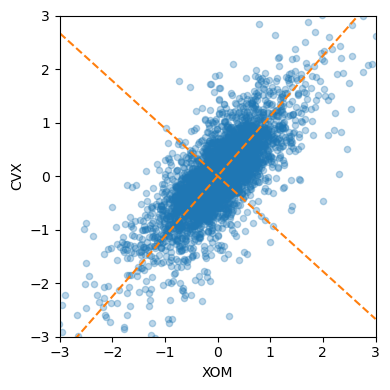

In [59]:
def abline(slope, intercept, ax):
    """Calculate coordinates of a line based on slope and intercept"""
    x_vals = np.array(ax.get_xlim())
    return(x_vals, intercept + slope * x_vals)

ax = oil_px.plot.scatter(x='XOM', y='CVX', alpha=0.3, figsize=(4,4))
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.plot(*abline(loadings.loc[0, 'CVX'] / loadings.loc[0, 'XOM'], 0, ax), 
        '--', color='C1')
ax.plot(*abline(loadings.loc[1, 'CVX'] / loadings.loc[1, 'XOM'], 0, ax), 
        '--', color='C1')


plt.tight_layout()
plt.show()

# Interpreting Principal Components

The following codes shows an example for a few top companies in the S&P 500. The information to create a loading plot from `scikit-learn` results is available in `explained_variance_`. Here, we convert it into a pandas data frame and use it to make a bar chart:

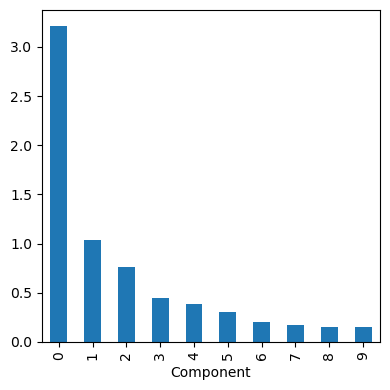

In [61]:
syms = sorted(['AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP',
              'JPM', 'WFC', 'USB','AXP', 'WMT', 'TGT', 'HD', 'COST'])
top_sp = sp500_px.loc[sp500_px.index >= '2011-01-01', syms]

sp_pca = PCA()
sp_pca.fit(top_sp)

explained_variance = pd.DataFrame(sp_pca.explained_variance_)
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(4,4))
ax.set_xlabel('Component')

plt.tight_layout()
plt.show()

It can be especially revealing to plot the weights of the top principal components. Here is the code to create visualization in _Python_.

In [63]:
loadings = pd.DataFrame(sp_pca.components_[0:5, :], columns=top_sp.columns)
print(loadings)

       AAPL       AXP       COP      COST      CSCO       CVX        HD  \
0  0.300825  0.246332  0.261529  0.273634  0.064059  0.444490  0.207983   
1  0.505116  0.139426 -0.174212  0.416307  0.031939 -0.289373  0.278002   
2  0.786730 -0.135458  0.002367 -0.465862  0.007524 -0.082374 -0.166320   
3 -0.120586  0.061814 -0.206026  0.092596  0.003904 -0.577665  0.162814   
4 -0.111576  0.596666  0.005813 -0.555529  0.039860 -0.109016  0.185488   

       INTC       JPM      MSFT       SLB       TGT       USB       WFC  \
0  0.076956  0.196397  0.105012  0.481786  0.148833  0.116421  0.145684   
1  0.033898  0.040723  0.053954 -0.472494  0.228123  0.054796  0.047427   
2  0.003518 -0.062261 -0.016248  0.194822 -0.160833 -0.048976 -0.041932   
3 -0.001605  0.057687 -0.012558  0.680914  0.109895  0.016752  0.018614   
4  0.072047  0.385160  0.077135 -0.181332  0.055557  0.155440  0.216425   

        WMT       XOM  
0  0.122304  0.317952  
1  0.222889 -0.154192  
2 -0.175806 -0.090167  
3 

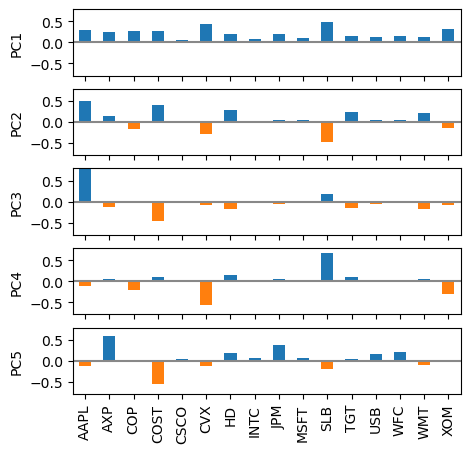

In [64]:
maxPC = 1.01 * np.max(np.max(np.abs(loadings.loc[0:5, :])))

f, axes = plt.subplots(5, 1, figsize=(5,5), sharex=True)
for i, ax in enumerate(axes):
    pc_loadings = loadings.loc[i, :]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-maxPC, maxPC)

# Correspondence Analysis

In _Python_, we can use the `prince` package, which implements correspondence analysis using the `scikit-lean` API:

In [74]:
from adjustText import adjust_text

ModuleNotFoundError: No module named 'adjustText'

NameError: name 'adjust_text' is not defined

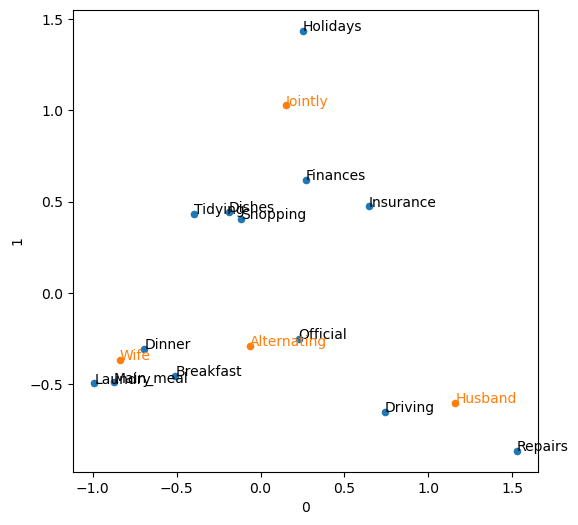

In [76]:
housetasks = pd.read_csv(HOUSE_TASKS_CSV, index_col=0)

ca = prince.CA(n_components=2)
ca = ca.fit(housetasks)

ax = ca.row_coordinates(housetasks).plot.scatter(x=0, y=1, figsize=(6,6))
ca.column_coordinates(housetasks).plot.scatter(x=0, y=1, ax=ax, c='C1')
texts = []
for idx, row in ca.row_coordinates(housetasks).iterrows():
    texts.append(plt.text(row[0], row[1], idx))
for idx, row in ca.column_coordinates(housetasks).iterrows():
    texts.append(plt.text(row[0], row[1], idx, color='C1'))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}) 
plt.tight_layout()
plt.show()

# K-Means Clustering

# A Simple Example

We use the `sklearn.cluster.KMeans` method from scikit-learn in _Python_:

In [81]:
df = sp500_px.loc[sp500_px.index >= '2011-01-01', ['XOM', 'CVX']]
kmeans = KMeans(n_clusters=4, n_init='auto').fit(df)
df['cluster'] = kmeans.labels_
print(df.head())

                 XOM       CVX  cluster
2011-01-03  0.736805  0.240681        2
2011-01-04  0.168668 -0.584516        0
2011-01-05  0.026631  0.446985        2
2011-01-06  0.248558 -0.919751        0
2011-01-07  0.337329  0.180511        2


In `scikit-learn`, the cluster _centers_ are available in the `cluster_centers_field`:

In [88]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['XOM', 'CVX'])
print(centers)

        XOM       CVX
0 -0.330814 -0.574398
1  0.927032  1.346412
2  0.231540  0.316965
3 -1.144397 -1.757796


In this example, with just two variables, it is straightforward to visualize the clusters and their means. The seaborn scatterplot function makes it easy to color (`hue`) and style (`style`) the points by a property:

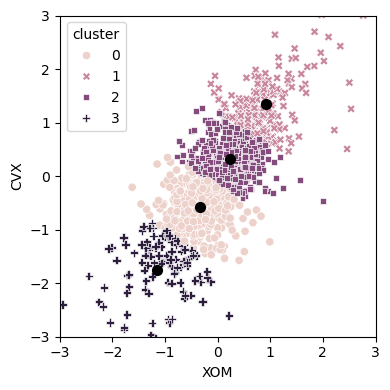

In [92]:
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.scatterplot(x='XOM', y='CVX', hue='cluster', style='cluster',
                    ax=ax, data=df)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
centers.plot.scatter(x='XOM', y='CVX', ax=ax, s=50, color='black')

plt.tight_layout()
plt.show()

The resulting plot shows the cluster assignments and the cluster means. Note that K-means will assign records to clusters, even if those clusters are not well separated (which can be useful if you need to optimally divide records into groups).

# K-Means Algorithm

The scikit-learn algorithm is repeated 10 by default (n_init). The argument max_iter (default 300) can be used to control the number of iterations:

In [108]:
syms = sorted(['AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP', 
               'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST'])
top_sp = sp500_px.loc[sp500_px.index >= '2011-01-01', syms]
kmeans = KMeans(n_clusters=5, n_init='auto').fit(top_sp)

# Interpreting the Clusters

The 2 most important outputs from kmeans are the _sizes_ of the clusters and the cluster _means_. In _Python_, we can use the `collections.Counter` class from the standard library to get this information. Due to the differences in the implementation and the inherent randomness of the algorithm, results will vary:

In [112]:
from collections import Counter
print(Counter(kmeans.labels_))

Counter({4: 301, 3: 296, 1: 264, 2: 158, 0: 112})


You can plot the centers of the clusters using this code in _Python_ and it is similar to waht we used for PCA:

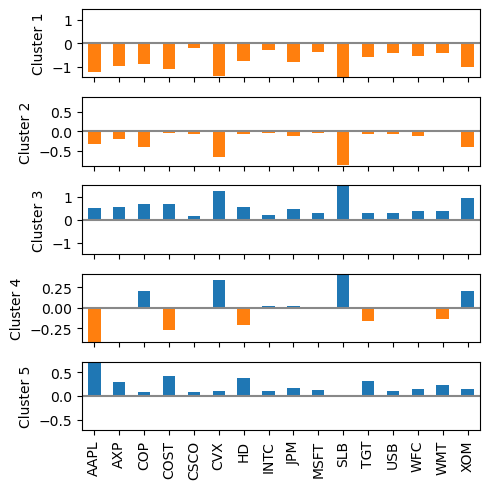

In [118]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=syms)

f, axes = plt.subplots(5, 1, figsize=(5, 5), sharex=True)
for i, ax in enumerate(axes):
    center = centers.loc[i, :]
    maxPC = 1.01 * np.max(np.max(np.abs(center)))
    colors = ['C0' if l > 0 else 'C1' for l in center]
    ax.axhline(color='#888888')
    center.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'Cluster {i + 1}')
    ax.set_ylim(-maxPC, maxPC)

plt.tight_layout()
plt.show()

# Selecting the Number of Clusters

For the KMeans result, we get this information from the property `inertia_`. After conversion into a pandas data frame, we can use its plot method to create the graph:

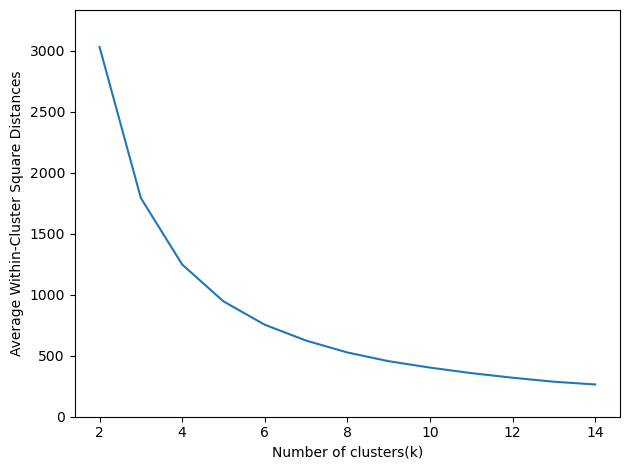

In [131]:
inertia = []
for n_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(top_sp)
    inertia.append(kmeans.inertia_ / n_clusters)

inertias = pd.DataFrame({'n_clusters': range(2, 15), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Square Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)

plt.tight_layout()
plt.show()